In [1]:
import os
# Define the root data directory
DATA_DIR = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection"

# Define the paths to the training and testing dicom folders respectively
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")

# Capture all the relevant full train/test paths
TRAIN_DICOM_PATHS = [os.path.join(TRAIN_DIR, f_name) for f_name in os.listdir(TRAIN_DIR)]
TEST_DICOM_PATHS = [os.path.join(TEST_DIR, f_name) for f_name in os.listdir(TEST_DIR)]
print(f"\n... The number of training files is {len(TRAIN_DICOM_PATHS)} ...")
print(f"... The number of testing files is {len(TEST_DICOM_PATHS)} ...")



... The number of training files is 15000 ...
... The number of testing files is 3000 ...


### Images

The raw data set is comprised of 18,000 images that were manually annotated by 17 experienced radiologists. The data set has been divided into a training set of 15,000 images and test set of 3,000 images. Each scan in training set was <u>**independently**</u> labeled by 3 different radiologists whereas each scan in test set was labeled based on <u>**consensus**</u> of 5 radiologists. So the training data we are given is not labelled in the same way as the test data.

![Data Labeling](https://bl3302files.storage.live.com/y4ms_W0BdOJoz1GO0wW8_X67xQvy8R-Zvkm5fB96xc8LS2wHsjYrj_GzUSqyHTMjgcVBl0MOvBJs07WCA2_srv5-b6gWhT4vObwGHUNQYbJqbg8dXwcg5K0N3mYl5R_69run2WnNDwIsIsHf2imnmn_FTYsefIbZoVYOqNDOFVZ1ybK7q3E8HmVPf8CN2co6cFT?width=500&height=500&cropmode=none)

<p>The original 18,000 images were in DICOM (Digital Imaging and Communications in Medicine) format and they consumed memory space of 191.82 GB. These images were preprocessed and converted into jpg format, consequently resulting in data set of 1.6 GB.

### CSV file

<p>Apart from the dicom image files, the data comes with train.csv file. There are 8 columns in CSV file and each column  contains the following information,

<br>image_id - unique image identifier
<br>class_name - the name of the class of detected object (or "No finding")
<br>class_id - the ID of the class of detected object
<br>rad_id - the ID of the radiologist that made the observation
<br>x_min - minimum X coordinate of the object's bounding box
<br>y_min - minimum Y coordinate of the object's bounding box
<br>x_max - maximum X coordinate of the object's bounding box
<br>y_max - maximum Y coordinate of the object's bounding box
    
<p>There are 67,914 rows. Each row contains information about one bounding box annotated by one radiologist in a single image.


In [2]:

import pandas as pd

train_csv_df = pd.read_csv("/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv")
train_csv_df.head()

image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     NaN     NaN     NaN     NaN

In [3]:
train_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    67914 non-null  object 
 1   class_name  67914 non-null  object 
 2   class_id    67914 non-null  int64  
 3   rad_id      67914 non-null  object 
 4   x_min       36096 non-null  float64
 5   y_min       36096 non-null  float64
 6   x_max       36096 non-null  float64
 7   y_max       36096 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
train_csv_df.describe()

class_id         x_min         y_min         x_max         y_max
count  67914.000000  36096.000000  36096.000000  36096.000000  36096.000000
mean       9.979312   1051.332696   1065.262051   1492.269337   1456.660489
std        5.036494    565.838078    552.925133    595.384126    581.134138
min        0.000000      0.000000      0.000000     68.000000    103.000000
25%        7.000000    602.000000    627.000000   1010.000000   1009.000000
50%       13.000000   1014.500000    935.000000   1567.000000   1411.000000
75%       14.000000   1457.000000   1471.000000   1947.000000   1911.000000
max       14.000000   2934.000000   3133.000000   3131.000000   3384.000000

### Abnormalities

<p>These are the 14 types of thoracic (chest) abnormalities that we need to classify and localize. If no abnormality is found in the image, we will classify it as "No finding" class.
 
<br>0 - Aortic enlargement
<br>1 - Atelectasis
<br>2 - Calcification
<br>3 - Cardiomegaly
<br>4 - Consolidation
<br>5 - ILD (Interstitial Lung Disease)
<br>6 - Infiltration
<br>7 - Lung Opacity
<br>8 - Nodule/Mass
<br>9 - Other lesion
<br>10 - Pleural effusion
<br>11 - Pleural thickening
<br>12 - Pneumothorax
<br>13 - Pulmonary fibrosis
<br>14 - No finding (absence of any of 14 diseases listed above)
    



In [5]:
# Distribution of 15 different abnormalities in given 15,000 train set images

print(f"\n... Total number of unique classes = {train_csv_df['class_name'].nunique()} ...\n")

# Count of each class is given below 
train_csv_df['class_name'].value_counts()


... Total number of unique classes = 15 ...



No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: class_name, dtype: int64

<p>From plot below, it can be observed that we are dealing with highly imbalanced data set. Almost half of the annotations marked in the data set are comprised of "No finding" class.

In [6]:
import plotly
import plotly.express as px

fig = px.histogram(train_csv_df, x="class_name", color="class_name",opacity=0.7,
                   labels={"class_name":"Abnormality"},
                   title="<b>Annotations Per Class</b>",
                   ).update_xaxes(categoryorder="total descending")
fig.update_layout(showlegend=False,
                  xaxis_title="",
                  yaxis_title="<b>Annotations Per Class</b>",
                  )
fig.show()

In [7]:
# calculating percentage distribution of each class annotations
def percent_distribution(train_csv_df):
    # Get the count for each label
    label_counts = train_csv_df.class_name.value_counts()

    # Get total number of samples
    total_samples = len(train_csv_df)

    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = label_counts.index[i]
        count = label_counts.values[i]
        percent = int((count / total_samples) * 10000) / 100
        print("{:<30s}:   {} or {}%".format(label, count, percent))

percent_distribution(train_csv_df)

No finding                    :   31818 or 46.85%
Aortic enlargement            :   7162 or 10.54%
Cardiomegaly                  :   5427 or 7.99%
Pleural thickening            :   4842 or 7.12%
Pulmonary fibrosis            :   4655 or 6.85%
Nodule/Mass                   :   2580 or 3.79%
Lung Opacity                  :   2483 or 3.65%
Pleural effusion              :   2476 or 3.64%
Other lesion                  :   2203 or 3.24%
Infiltration                  :   1247 or 1.83%
ILD                           :   1000 or 1.47%
Calcification                 :   960 or 1.41%
Consolidation                 :   556 or 0.81%
Atelectasis                   :   279 or 0.41%
Pneumothorax                  :   226 or 0.33%


### Annotations



#### Annotations per Unique Image

In [8]:
print(f"\n... Total number of unique images = {train_csv_df['image_id'].nunique()} ...\n")

# Count of the number of annotations per unique image
train_csv_df['image_id'].value_counts()


... Total number of unique images = 15000 ...



03e6ecfa6f6fb33dfeac6ca4f9b459c9    57
fa109c087e46fe1ea27e48ce6d154d2f    52
e31be972e181987a8600a8700c1ebe88    48
6d5acf3f8a973a26844d617fffe72998    46
ecf474d5d4f65d7a3e23370a68b8c6a0    46
                                    ..
9af0c589acd7aaeb91faa73a655ee85d     3
f5479abf714c907a22abe972dcbd2ce5     3
e06191cd733ebbe6529918d65952891d     3
4c4c01f3b10b1fe2389db44d250fc7ae     3
011244ab511b20130d846f5f8f0c3866     3
Name: image_id, Length: 15000, dtype: int64

From plot below, it can be observed that the training images contain
* atleast 3 annotations (1 distinct object annotation by 3 radiologists)
* at most 57 annotations 

<p> The distribution overall is heavily skewed. The vast majority of images only have 3 annotations (~11,000 out of 15,000 images)

In [9]:
fig = px.histogram(train_csv_df.image_id.value_counts(), 
                   log_y=True, color_discrete_sequence=['indianred'], opacity=0.7,
                   labels={"value":"Annotations Per Image"},
                   title="<b>Distribution of Annotations per each unique CXR scan" \
                         "<i><sub>(Log Scale for Y-Axis)</sub></i></b>",
                   )
fig.update_layout(showlegend=False,
                  xaxis_title="Annotation Count",
                  yaxis_title="Unique Images Count",
                  )
fig.show()

Let's take a look at a sample image with only 3 annotations in the train.csv file.

In [10]:
train_csv_df[train_csv_df['image_id']=='000434271f63a053c4128a0ba6352c7f']

image_id  class_name  class_id rad_id  x_min  \
689    000434271f63a053c4128a0ba6352c7f  No finding        14     R6    NaN   
56742  000434271f63a053c4128a0ba6352c7f  No finding        14     R2    NaN   
65515  000434271f63a053c4128a0ba6352c7f  No finding        14     R3    NaN   

       y_min  x_max  y_max  
689      NaN    NaN    NaN  
56742    NaN    NaN    NaN  
65515    NaN    NaN    NaN

Now let's take a look at a sample image with 57 annotations in the train.csv file.

In [11]:
train_csv_df[train_csv_df['image_id']=='03e6ecfa6f6fb33dfeac6ca4f9b459c9']

image_id   class_name  class_id rad_id   x_min  \
757    03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   562.0   
1906   03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8    R10  2046.0   
2087   03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8    R10  1766.0   
2489   03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2239.0   
2610   03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   515.0   
3318   03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2030.0   
5824   03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   628.0   
6628   03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2018.0   
9194   03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9  1775.0   
12042  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   424.0   
12234  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2438.0   
13136  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9  2432.0   
14463  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   448.0   
15346  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9  2382.0   
16073  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   374.0   
17059  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   368.0   
18169  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   537.0   
18566  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2476.0   
20253  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   400.0   
21867  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2425.0   
25027  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8    R10   244.0   
26314  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   823.0   
27714  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   757.0   
33358  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   397.0   
34016  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   503.0   
35289  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2213.0   
36073  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   894.0   
37005  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   704.0   
37684  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   556.0   
37877  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   682.0   
38374  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2442.0   
39813  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9  2353.0   
39915  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   894.0   
41536  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   408.0   
41550  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9  2013.0   
42949  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   618.0   
43357  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2358.0   
48953  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   532.0   
48977  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   537.0   
49143  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2269.0   
49434  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9  2240.0   
50453  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   536.0   
50893  03e6ecfa6f6fb33dfeac6ca4f9b459c9          ILD         5     R9  1751.0   
51363  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9   949.0   
52787  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8   691.0   
53293  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2427.0   
55165  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R8  2553.0   
56529  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8     R9  1872.0   
59265  03e6ecfa6f6fb33dfeac6ca4f9b459c9  Nodule/Mass         8

#### Unique Annotations per Unique Image

The goal of this is to determine the distribution of distinct diseases within the same patient. So for example, if a radiologist identifies 8 modules of same disease in an image, we count it as one annotation.

From plot below, it can be observed that the training images contain
* Images contain no more than 10 unique abnormalities (out of a possible 14)
* The more unique abnormalities present in an image, the rarer it is. For example, out of 15,000 patients there are only 4 patients diagnosed with 10 distinct diseases 
* The vast majority of images only have 1 annotations (~11,000 out of 15,000 images)

In [12]:
fig = px.histogram(train_csv_df.groupby('image_id')["class_name"].unique().apply(lambda x: len(x)), 
             log_y=True, color_discrete_sequence=['skyblue'], opacity=0.7,
             labels={"value":"Number of Distinct Annotations"},
             title="<b>Distribution of Distinct Diseases per patient" \
                   "<i><sub>(Log Scale for Y-Axis)</sub></i></b>",
                   )
fig.update_layout(showlegend=False,
                  xaxis_title="Number of Distinct Annotations",
                  yaxis_title="Count of Patients",
                  )
fig.show()

### Radiologists

The `rad_id` column indicates the the ID of the radiologist that made the observation. Remember, three radiologists will annotate a given image out of a pool of seventeen possible radiologists, where the radiologist ID is encoded from R1 to R17.

#### Annotations per Radiologist

From plot below, it can be observed that
* 3 of the radiologists (R9, R10, & R8 in that order) are responsible for the vast majority of annotations (~60% of all annotations)
* Among the other 14 radiologists there is some variation around the number of annotations made, however, these 14 radiologists all made between 3121 annotations and 812 annotations



In [13]:
fig = px.histogram(train_csv_df, x="rad_id", color="rad_id",opacity=0.85,
                   labels={"rad_id":"Radiologist ID"},
                   title="<b>Distribution of Annotations Per Radiologist</b>",
                   ).update_xaxes(categoryorder="total descending")
fig.update_layout(showlegend=False,
                  xaxis_title="Radiologist ID",
                  yaxis_title="Number of Annotations",
                  )
fig.show()

### Do the radiologists agree or disagree when they independently review CXRs?

We will check for No findings class to check if all 3 radiologists agree or not. Thus we will aggregate the image_id by class 14 and check if the count is 3 or not.

In [14]:
is_normal_df = train_csv_df.groupby("image_id")["class_id"].agg(lambda s: (s == 14).sum()).reset_index().rename({"class_id": "num_normal_annotations"}, axis=1)

In [15]:
is_normal_df.head()

image_id  num_normal_annotations
0  000434271f63a053c4128a0ba6352c7f                       3
1  00053190460d56c53cc3e57321387478                       3
2  0005e8e3701dfb1dd93d53e2ff537b6e                       0
3  0006e0a85696f6bb578e84fafa9a5607                       3
4  0007d316f756b3fa0baea2ff514ce945                       0

In [16]:
is_normal_df[(is_normal_df["num_normal_annotations"]!=3) & (is_normal_df["num_normal_annotations"]!=0)]

Empty DataFrame
Columns: [image_id, num_normal_annotations]
Index: []

Thus all the radioligists agree whether a CXR is healthy or abnormal

In [17]:
abnormality_0 = train_csv_df.groupby("image_id")["class_id"].agg(lambda s: (s == 0).sum()).reset_index().rename({"class_id": "num_normal_annotations"}, axis=1)
len(abnormality_0[(abnormality_0["num_normal_annotations"]!=3) & (abnormality_0["num_normal_annotations"]!=0)])

1325

But radiologists don't always agree on an abnormality

#### Creating dictionary mappings

Here we are creating the mappings between
* `class_id` and `class_name`
* `class_name` and `class_id`
* `class_id` and class color

In [18]:
import seaborn as sns
LABEL_COLORS = [px.colors.label_rgb(px.colors.convert_to_RGB_255(x)) for x in sns.color_palette("Spectral", 15)]

# Create dictionary mappings
int_2_str = {i:train_csv_df[train_csv_df["class_id"]==i].iloc[0]["class_name"] for i in range(15)}
str_2_int = {v:k for k,v in int_2_str.items()}
int_2_clr = {str_2_int[k]:LABEL_COLORS[i] for i,k in enumerate(sorted(str_2_int.keys()))}

print("\n... Dictionary Mapping Class Integer to Class String Representation [int_2_str]...\n")
display(int_2_str)

print("\n... Dictionary Mapping Class String to Class Integer Representation [str_2_int]...\n")
display(str_2_int)

print("\n... Dictionary Mapping Class Integer to Color Representation [str_2_clr]...\n")
display(int_2_clr)


... Dictionary Mapping Class Integer to Class String Representation [int_2_str]...



{0: 'Aortic enlargement',
 1: 'Atelectasis',
 2: 'Calcification',
 3: 'Cardiomegaly',
 4: 'Consolidation',
 5: 'ILD',
 6: 'Infiltration',
 7: 'Lung Opacity',
 8: 'Nodule/Mass',
 9: 'Other lesion',
 10: 'Pleural effusion',
 11: 'Pleural thickening',
 12: 'Pneumothorax',
 13: 'Pulmonary fibrosis',
 14: 'No finding'}


... Dictionary Mapping Class String to Class Integer Representation [str_2_int]...



{'Aortic enlargement': 0,
 'Atelectasis': 1,
 'Calcification': 2,
 'Cardiomegaly': 3,
 'Consolidation': 4,
 'ILD': 5,
 'Infiltration': 6,
 'Lung Opacity': 7,
 'Nodule/Mass': 8,
 'Other lesion': 9,
 'Pleural effusion': 10,
 'Pleural thickening': 11,
 'Pneumothorax': 12,
 'Pulmonary fibrosis': 13,
 'No finding': 14}


... Dictionary Mapping Class Integer to Color Representation [str_2_clr]...



{0: 'rgb(193, 39, 74)',
 1: 'rgb(221, 74, 76)',
 2: 'rgb(240, 103, 68)',
 3: 'rgb(249, 142, 82)',
 4: 'rgb(253, 181, 103)',
 5: 'rgb(254, 212, 129)',
 6: 'rgb(254, 236, 159)',
 7: 'rgb(255, 255, 190)',
 14: 'rgb(239, 249, 166)',
 8: 'rgb(214, 238, 155)',
 9: 'rgb(177, 223, 163)',
 10: 'rgb(134, 207, 165)',
 11: 'rgb(94, 185, 169)',
 12: 'rgb(61, 149, 184)',
 13: 'rgb(68, 113, 178)'}

#### Annotations per Radiologists based on Class type 

Here we would like to identify if all 17 radiologists were able to see and annotate all 15 classes or not.

From plot below, it can be observed that

* Among the 17 radiologists, 7 of them (R1 through R7) have only ever annotated images as `No finding`
* When compared to the 3 main radiologists (R8 through R10), the annotations made by other 7 radiologists are heavily skewed towards the `No finding` label


In [19]:
import plotly.graph_objects as go

fig = go.Figure()

for i in range(15):
    fig.add_trace(go.Histogram(
        x=train_csv_df[train_csv_df["class_id"]==i]["rad_id"],
        marker_color=int_2_clr[i],
        name=f"<b>{int_2_str[i]}</b>"
    ))

fig.update_xaxes(categoryorder="total descending")
fig.update_layout(title="<b>Distribution of Class Label Annotations by Radiologist</b>",
                  barmode='stack',
                  xaxis_title="Radiologist ID",
                  yaxis_title="Number of Annotations",
                 )
fig.show()

### Bounding Box Coordinates

The **`x_min`**, **`y_min`**, **`x_max`**, and **`y_max`** columns indicate the location of the annotated object bounding box, where the top-left corner is represented by the tuple (**`x_min`**, **`y_min`**) and the bottom-right corner is represented by the tuple (**`x_max`**, **`y_max`**).

A value of **`NaN`** coincides with a label 14 (**`No finding`**) and means that there is nothing to annotate (healthy x-ray).<br>
For the purpose of examining these columns we will <b style="text-decoration: underline;">only be examining rows where the objects have been annotated with a bounding box</b><br>
(i.e. All rows with a label of **`No finding`** will be discarded)<br><br>

The important thing to focus on will be identifying for each class the approximate range of locations the annotations are found in and the intensity of the locations within the heatmap.

**From the heatmaps plotted below we can ascertain the following information**
*  Aortic Enlargement <i><sub>(CLASS-ID: 0)</sub></i>
    * Heatmap distribution is slightly oval (vertical) and is very tight and intense, located in the centre of the image (slight drift to the top-right).
*  Atelectasis <i><sub>(CLASS-ID: 1)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse with a circular focus on the upper-left part of the left lung.
*  Calcification <i><sub>(CLASS-ID: 2)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse with a oval (vertical) focus on the top-left edge of the right lung.
*  Cardiomegaly <i><sub>(CLASS-ID: 3)</sub></i>
    * Heatmap distribution is rectangular and is very tight and intense, located in the bottom-centre (to bottom-centre-right) of the image.
*  Consolidation <i><sub>(CLASS-ID: 4)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse, the focus of the distribution covers the entire left lung.
*  ILD <i><sub>(CLASS-ID: 5)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse, the focus leans a little towards the centre of the lungs.
*  Infiltration <i><sub>(CLASS-ID: 6)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse, the focus of the distribution covers the entire left lung.
*  Lung Opacity <i><sub>(CLASS-ID: 7)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse, the focus of the distribution covers the entire left lung.
*  Nodule/Mass <i><sub>(CLASS-ID: 8)</sub></i>
    * Heatmap distribution is lung shaped and relatively diffuse, the focus leans a little towards the centre of the lungs. <b>(NOTE: The diffusion pattern looks patchy... probably due to smaller bounding boxes)</b>
*  Other Lesion <i><sub>(CLASS-ID: 9)</sub></i>
    * Heatmap distribution is incredibly diffuse and covers most of the image, the focus is towards a vertical-strip in the centre of the image.
*  Pleural Effusion <i><sub>(CLASS-ID: 10)</sub></i>
    * Heatmap distribution is lung shaped (slightly more rectangular?) and relatively diffuse, the focus is towards the bottom of the lungs and although both lungs are covered, the left lung has a stronger focus.
*  Pleural Thickening <i><sub>(CLASS-ID: 11)</sub></i>
    * Heatmap distribution is vaguely lung shaped (patches near top and focus trails down exterior lung edge fading as it goes), the focus is towards the top of the lungs is oval (horizontal).
*  Pneumothorax <i><sub>(CLASS-ID: 12)</sub></i>
    * Heatmap distribution is lung shaped (more rectangular), the focus is on the entire left lung however the right lung has some diffuse coverage.
*  Pulmonary Fibrosis <i><sub>(CLASS-ID: 13)</sub></i>
    * Heatmap distribution is vaguely lung shaped (patches near top and focus trails down lung fading as it goes), the focus is towards the top of the lung and it is oval.

In [20]:
import numpy as np
import tqdm
from tqdm.notebook import tqdm
import pydicom


# Get paths to images where bboxes exist `class_id!=14`
bbox_df = train_csv_df[train_csv_df.class_id!=14].reset_index(drop=True)
BBOX_PATHS = [
    os.path.join(TRAIN_DIR, name+".dicom") \
    for name in bbox_df.image_id.unique()
]

# Initalize our map for image sizes
sizes_of_images_w_bboxes = {}

# ############################################################### #
# ############## THIS STEP WILL TAKE 10 MINUTES ############## #
# ############################################################### #
#
# Get the image sizes so we can resize the bboxes all based on a static size
# so that we can generate a heatmap that is representative of the actual
# locations of annotations
for path in tqdm(BBOX_PATHS, total=len(BBOX_PATHS)):
    dicom = pydicom.read_file(path)
    sizes_of_images_w_bboxes[path[:-6].rsplit("/", 1)[1]] = \
        (dicom.Rows, dicom.Columns)
# ############################################################### #

# Create new dataframe columns for the source image width and height
bbox_df["img_height"] = bbox_df["image_id"].map(lambda x: sizes_of_images_w_bboxes[x][0])
bbox_df["img_width"] = bbox_df["image_id"].map(lambda x: sizes_of_images_w_bboxes[x][1])

# Create new dataframe columns for the bboxes that is a 
# percentage of the respective source image width and height
#   -- i.e. if x_min is 100 and the image width is 1000 than frac_x_min is 0.1
#   -- i.e. if y_max is 28 and the image height is 900 than frac_y_max is 0.031
#
def create_fractional_bbox_coordinates(row):
    """ Function to return bbox coordiantes as fractions from DF row """
    frac_x_min = row["x_min"]/row["img_width"]
    frac_x_max = row["x_max"]/row["img_width"]
    frac_y_min = row["y_min"]/row["img_height"]
    frac_y_max = row["y_max"]/row["img_height"]
    return frac_x_min, frac_x_max, frac_y_min, frac_y_max

# This will allow us to pick a heat-map size and make sure that we can use
# all of the bounding boxes and scale them appropriately
#   -- NOTE: We will most likely default the heatmap to the average
#            image shape so that there is as little distortion as possible
bbox_df["frac_x_min"], bbox_df["frac_x_max"], bbox_df["frac_y_min"], bbox_df["frac_y_max"] = \
    zip(*bbox_df.apply(create_fractional_bbox_coordinates, axis=1))

# # Record some important values for later
ave_src_img_height = np.mean([size[0] for size in sizes_of_images_w_bboxes.values()], dtype=np.int32)
ave_src_img_width  = np.mean([size[1] for size in sizes_of_images_w_bboxes.values()], dtype=np.int32)

# # Preview the dataframe
bbox_df.head()

  0%|          | 0/4394 [00:00<?, ?it/s]

image_id          class_name  class_id rad_id  \
0  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
1  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
2  1c32170b4af4ce1a3030eb8167753b06  Pleural thickening        11     R9   
3  0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD         5    R17   
4  47ed17dcb2cbeec15182ed335a8b5a9e         Nodule/Mass         8     R9   

    x_min   y_min   x_max   y_max  img_height  img_width  frac_x_min  \
0   691.0  1375.0  1653.0  1831.0        2336       2080    0.332212   
1  1264.0   743.0  1611.0  1019.0        2880       2304    0.548611   
2   627.0   357.0   947.0   433.0        3072       2540    0.246850   
3  1347.0   245.0  2188.0  2169.0        2555       2285    0.589497   
4   557.0  2352.0   675.0  2484.0        3353       2568    0.216900   

   frac_x_max  frac_y_min  frac_y_max  
0    0.794712    0.588613    0.783818  
1    0.699219    0.257986    0.353819  
2    0.372835    0.116211    0.140951  
3    0.957549    0.095890    0.848924  
4    0.262850    0.701461    0.740829

  0%|          | 0/36096 [00:00<?, ?it/s]

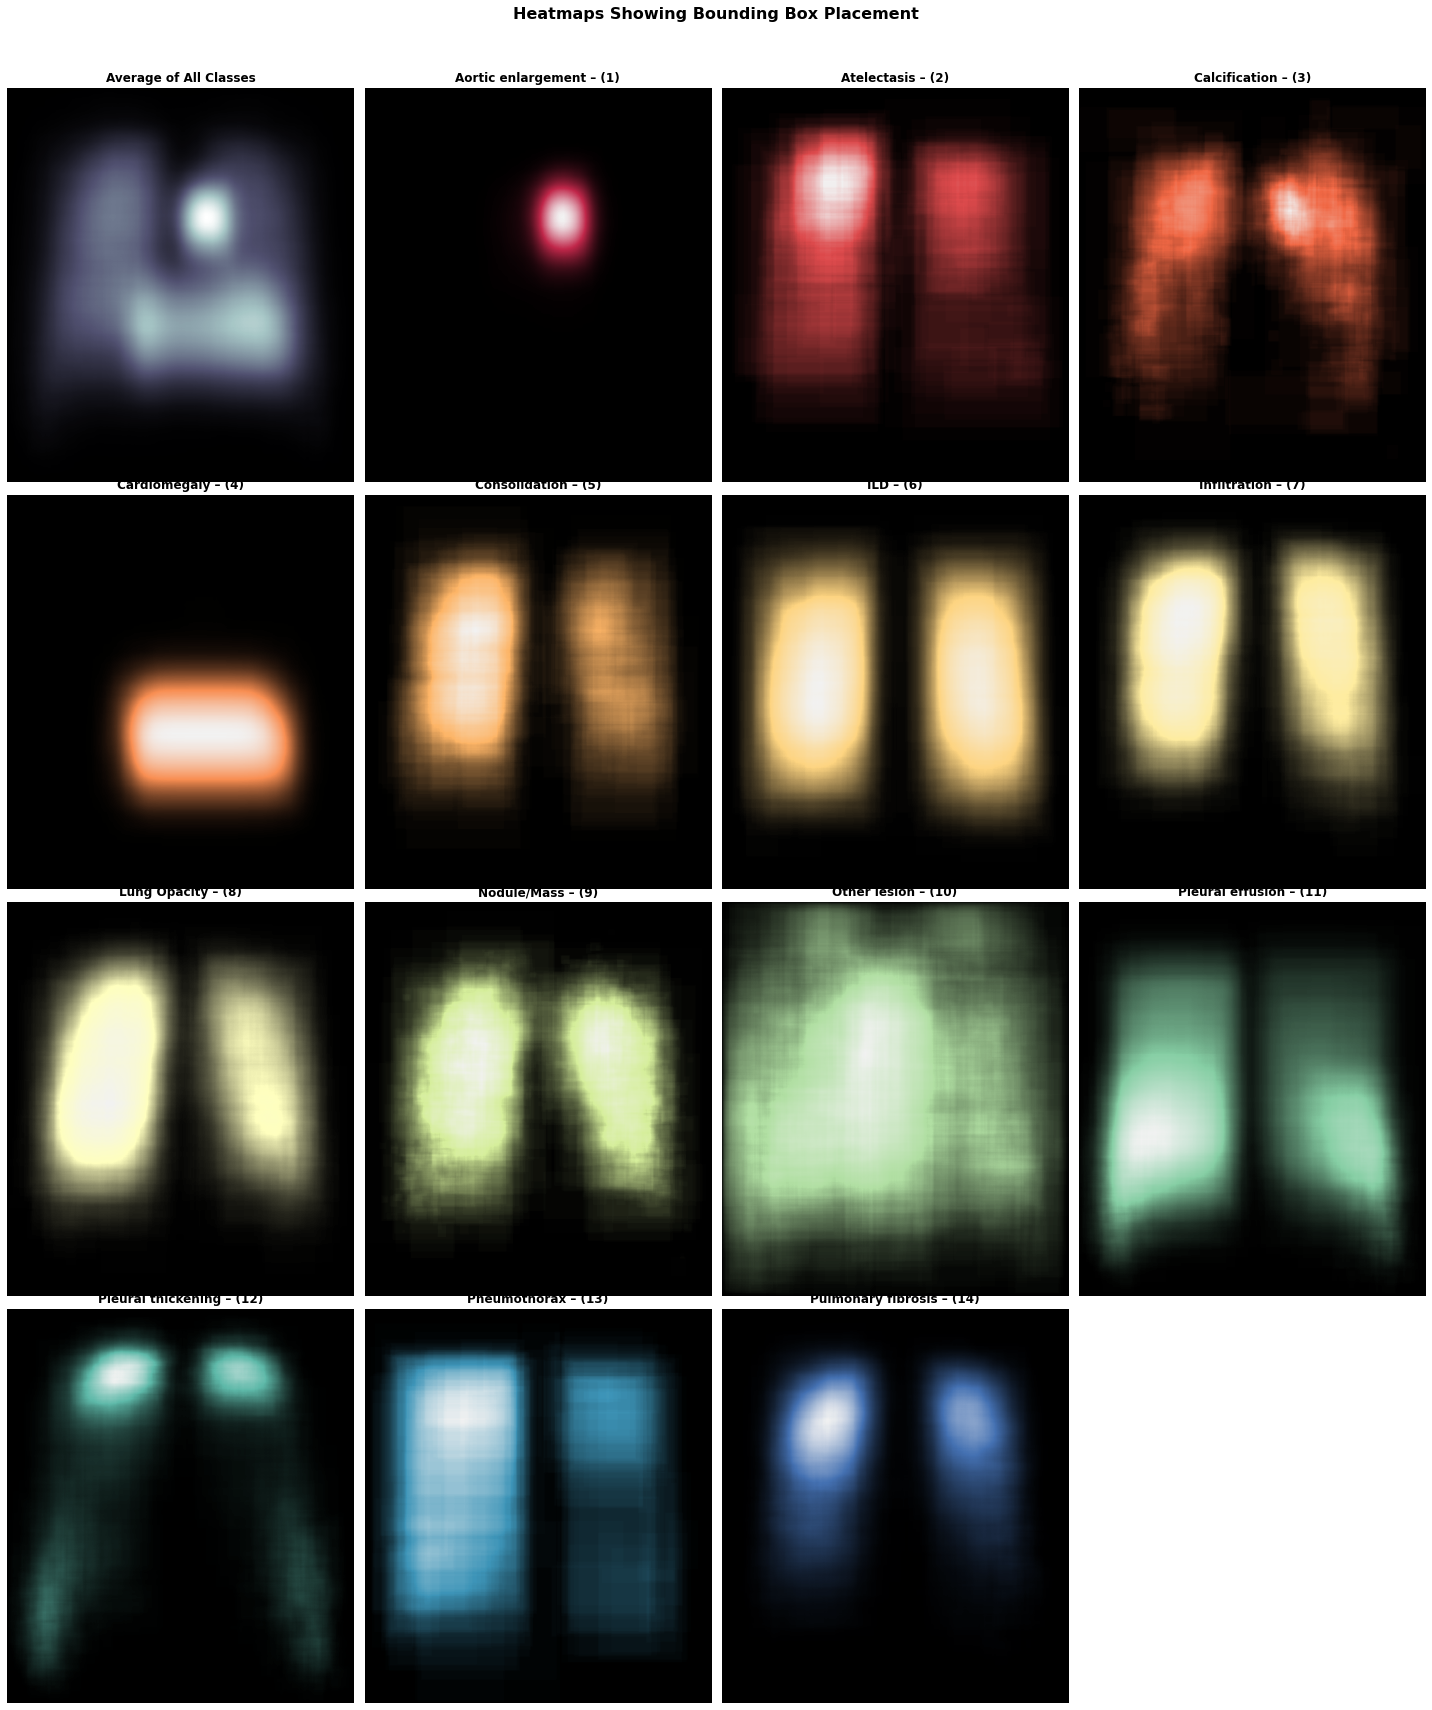

In [21]:
import matplotlib.pyplot as plt
import matplotlib

# DEFAULT
HEATMAP_SIZE = (ave_src_img_height, ave_src_img_width, 14)

# Initialize
heatmap = np.zeros((HEATMAP_SIZE), dtype=np.int16)
bbox_np = bbox_df[["class_id", "frac_x_min", "frac_x_max", "frac_y_min", "frac_y_max"]].to_numpy()
bbox_np[:, 1:3] *= ave_src_img_width
bbox_np[:, 3:5] *= ave_src_img_height
bbox_np = np.floor(bbox_np).astype(np.int16)

# Color map stuff
custom_cmaps = [
    matplotlib.colors.LinearSegmentedColormap.from_list(
        colors=[(0.,0.,0.), c, (0.95,0.95,0.95)], 
        name=f"custom_{i}") for i,c in enumerate(sns.color_palette("Spectral", 15))
]
custom_cmaps.pop(8) # Remove No-Finding

for row in tqdm(bbox_np, total=bbox_np.shape[0]):
    heatmap[row[3]:row[4]+1, row[1]:row[2]+1, row[0]] += 1
    
fig = plt.figure(figsize=(20,25))
plt.suptitle("Heatmaps Showing Bounding Box Placement\n ", fontweight="bold", fontsize=16)
for i in range(15):
    plt.subplot(4, 4, i+1)
    if i==0:
        plt.imshow(heatmap.mean(axis=-1), cmap="bone")
        plt.title(f"Average of All Classes", fontweight="bold")
    else:
        plt.imshow(heatmap[:, :, i-1], cmap=custom_cmaps[i-1])
        plt.title(f"{int_2_str[i-1]} – ({i})", fontweight="bold")
        
    plt.axis(False)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

<b style="text-decoration: underline; font-family: Verdana;">INVESTIGATE THE SIZES OF BOUNDING BOXES AND THE IMPACT OF CLASS</b>

As we wish to examine the average, as well as the upper and lower limits for various class-based bounding box statistics, we will use a box plot to investigate. To make things easier to understand let us consider the following basic buckets.

<b><u>Bounding Box Area - Median</u></b>
* Under   0.01 –– <b>Smallest</b>
* 0.01 to 0.02 –– <b>Small</b>
* 0.02 to 0.04 –– <b>Medium</b>
* 0.04 to 0.06 –– <b>Large</b>
* Above   0.06 –– <b>Largest</b>

<b><u>Bounding Box Area - Quartile Range</u></b>
* Under     0.0075 –– <b>Smallest</b>
* 0.0075 to 0.0125 –– <b>Small</b>
* 0.0125 to 0.0250 –– <b>Medium</b>
* 0.0250 to 0.0500 –– <b>Large</b>
* Above     0.0500 –– <b>Largest</b>

---

**From the boxplot plotted below we can ascertain the following information**
* Regarding Aortic Enlargement Box Plot <i><sub>(CLASS-ID: 0)</sub></i>
    * Median Value is <b>Small</b>  –––  Quartile Range is <b>Smallest</b>
* Regarding Atelectasis Box Plot <i><sub>(CLASS-ID: 1)</sub></i>
    * Median Value is <b>Medium</b>  –––  Quartile Range is <b>Large</b>
* Regarding Calcification Box Plot <i><sub>(CLASS-ID: 2)</sub></i>
    * Median Value is <b>Smallest</b>  –––  Quartile Range is <b>Medium</b>
* Regarding Cardiomegaly Box Plot <i><sub>(CLASS-ID: 3)</sub></i>
    * Median Value is <b>Large</b>  –––  Quartile Range is <b>Large</b>
* Regarding Consolidation Box Plot <i><sub>(CLASS-ID: 4)</sub></i>
    * Median Value is <b>Medium</b>  –––  Quartile Range is <b>Large</b>
* Regarding ILD Box Plot <i><sub>(CLASS-ID: 5)</sub></i>
    * Median Value is <b>Largest</b>  –––  Quartile Range is <b>Largest</b>
* Regarding Infiltration Box Plot <i><sub>(CLASS-ID: 6)</sub></i>
    * Median Value is <b>Medium</b>  –––  Quartile Range is <b>Large</b>
* Regarding Lung Opacity Box Plot <i><sub>(CLASS-ID: 7)</sub></i>
    * Median Value is <b>Medium</b>  –––  Quartile Range is <b>Large</b>
* Regarding Nodule/Mass Box Plot <i><sub>(CLASS-ID: 8)</sub></i>
    * Median Value is <b>Smallest</b>  –––  Quartile Range is <b>Smallest</b>
* Regarding Other Lesion Box Plot <i><sub>(CLASS-ID: 9)</sub></i>
    * Median Value is <b>Small</b>  –––  Quartile Range is <b>Large</b>
* Regarding Pleural Effusion Box Plot <i><sub>(CLASS-ID: 10)</sub></i>
    * Median Value is <b>Smallest</b>  –––  Quartile Range is <b>Large</b>
* Regarding Pleural Thickening Box Plot <i><sub>(CLASS-ID: 11)</sub></i>
    * Median Value is <b>Smallest</b>  –––  Quartile Range is <b>Smallest</b>
* Regarding Pneumothorax Box Plot <i><sub>(CLASS-ID: 12)</sub></i>
    * Median Value is <b>Largest</b>  –––  Quartile Range is <b>Largest</b>
* Regarding Pulmonary Fibrosis Box Plot <i><sub>(CLASS-ID: 13)</sub></i>
    * Median Value is <b>Small</b>  –––  Quartile Range is <b>Medium</b>


In [22]:
LABEL_COLORS_WOUT_NO_FINDING = LABEL_COLORS[:8]+LABEL_COLORS[9:]

# Update bbox dataframe for boxplots
bbox_df["frac_bbox_area"] = (bbox_df["frac_x_max"]-bbox_df["frac_x_min"])*(bbox_df["frac_y_max"]-bbox_df["frac_y_min"])
bbox_df["class_id_as_str"] = bbox_df["class_id"].map(int_2_str)
display(bbox_df.head())

fig = px.box(bbox_df.sort_values(by="class_id_as_str"), x="class_id_as_str", y="frac_bbox_area", color="class_id_as_str", 
             color_discrete_sequence=LABEL_COLORS_WOUT_NO_FINDING, notched=True,
             labels={"class_id_as_str":"Class Name", "frac_bbox_area":"BBox Area (%)"},
             title="<b>DISTRIBUTION OF BBOX AREAS AS % OF SOURCE IMAGE AREA   " \
                   "<i><sub>(Some Upper Outliers Excluded For Better Visualization)</sub></i></b>")

fig.update_layout(showlegend=True,
                  yaxis_range=[-0.025,0.4],
                  legend_title_text=None,
                  xaxis_title="",
                  yaxis_title="<b>Bounding Box Area %</b>",
                  )
fig.show()

image_id          class_name  class_id rad_id  \
0  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
1  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
2  1c32170b4af4ce1a3030eb8167753b06  Pleural thickening        11     R9   
3  0c7a38f293d5f5e4846aa4ca6db4daf1                 ILD         5    R17   
4  47ed17dcb2cbeec15182ed335a8b5a9e         Nodule/Mass         8     R9   

    x_min   y_min   x_max   y_max  img_height  img_width  frac_x_min  \
0   691.0  1375.0  1653.0  1831.0        2336       2080    0.332212   
1  1264.0   743.0  1611.0  1019.0        2880       2304    0.548611   
2   627.0   357.0   947.0   433.0        3072       2540    0.246850   
3  1347.0   245.0  2188.0  2169.0        2555       2285    0.589497   
4   557.0  2352.0   675.0  2484.0        3353       2568    0.216900   

   frac_x_max  frac_y_min  frac_y_max  frac_bbox_area     class_id_as_str  
0    0.794712    0.588613    0.783818        0.090283        Cardiomegaly  
1    0.699219    0.257986    0.353819        0.014433  Aortic enlargement  
2    0.372835    0.116211    0.140951        0.003117  Pleural thickening  
3    0.957549    0.095890    0.848924        0.277156                 ILD  
4    0.262850    0.701461    0.740829        0.001809         Nodule/Mass

### DICOM metadata

So, what information is contained in a .dicom file? We'll use an image that has some abnormalities.

In [23]:
train_csv_df[train_csv_df['image_id']=='9a5094b2563a1ef3ff50dc5c7ff71345']

image_id          class_name  class_id rad_id  \
2      9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
5517   9a5094b2563a1ef3ff50dc5c7ff71345    Pleural effusion        10     R9   
25023  9a5094b2563a1ef3ff50dc5c7ff71345  Pleural thickening        11     R9   
26165  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3     R9   
42709  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3     R8   
53473  9a5094b2563a1ef3ff50dc5c7ff71345  Aortic enlargement         0     R9   

        x_min   y_min   x_max   y_max  
2       691.0  1375.0  1653.0  1831.0  
5517   1789.0  1729.0  1875.0  1992.0  
25023  1789.0  1729.0  1875.0  1992.0  
26165   692.0  1375.0  1657.0  1799.0  
42709   689.0  1313.0  1666.0  1763.0  
53473  1052.0   715.0  1299.0   966.0

In [24]:
import pydicom

dicom_sample = pydicom.read_file('../input/vinbigdata-chest-xray-abnormalities-detection/train/9a5094b2563a1ef3ff50dc5c7ff71345.dicom')
dicom_sample

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 158
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 9a5094b2563a1ef3ff50dc5c7ff71345
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient's Age                       AS: '061Y'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME1'
(0028, 0010) Rows                                US: 2336
(0028, 0011) Columns                             US: 2080
(0028, 0100) Bits Al

In [25]:
dir(dicom_sample)

['BitsAllocated',
 'BitsStored',
 'Columns',
 'HighBit',
 'PatientAge',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'Rows',
 'SamplesPerPixel',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_character_set',
 '_convert_pixel_data_using_handler',
 '_convert_pixel_data_without_handler',
 '_dataset_slice',
 '_do_pixel_data_conversion',
 '_pretty_str',
 '_set_file_meta',
 '_slice_dataset',
 'add',
 'add_new',
 'clear',
 'convert_pixel_data',
 'copy',
 'data_element',
 'decode',
 'decompress',
 'dir',
 'elements',
 'ensure_file_meta',
 'fix_meta_

We might be able to gain some insight from age, sex, rows and columns values of dicom meta data but the rest do not be seem to be very useful.

In [26]:
# list containing full paths to image_ids of all dicoms
TRAIN_DICOM_PATHS

['/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/4d390e07733ba06e5ff07412f09c0a92.dicom',
 '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/289f69f6462af4933308c275d07060f0.dicom',
 '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/68335ee73e67706aa59b8b55b54b11a4.dicom',
 '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/7ecd6f67f649f26c05805c8359f9e528.dicom',
 '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/2229148faa205e881cf0d932755c9e40.dicom',
 '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/8c87779485ae5e21e25cb57e9510e149.dicom',
 '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/76b23891649862f2b3b95f9bebf0a70c.dicom',
 '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/ba1795ee5daae1ed415756c3f4f21b48.dicom',
 '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/aa6475267e83947ee5078281a7ff3df3.dicom',
 '/kaggle/input/vin

In [27]:
# ############################################################### #
# ############## THIS STEP WILL TAKE 30 MINUTES ############## #
# ############################################################### #

# converting dicom meta data to pandas dataframe

import re
import tqdm
from tqdm.notebook import tqdm
import pandas as pd
import pydicom

prog = re.compile('^[A-Z]*')

def get_dcm_contents(file):
    dcm = pydicom.read_file(file)    
    properties = [string for string in dir(dcm) if prog.match(string).group(0)!='']
    dict1 = {'file': file.replace('.dicom', '')}    
    dict1.update( { what: dcm[what].value for what in properties if isinstance(dcm[what].value, (bytes, bytearray))!=True } )
    return dict1
    
train_dicom_files = pd.DataFrame( [ get_dcm_contents(file) for file in tqdm(TRAIN_DICOM_PATHS) ] )


  0%|          | 0/15000 [00:00<?, ?it/s]

In [28]:
# saving df to csv file
train_dicom_files.to_csv('train_dicom_metadata.csv', index=False)

train_dicom_files.head()

file  BitsAllocated  \
0  /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
1  /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
2  /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
3  /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
4  /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   

   BitsStored  Columns  HighBit LossyImageCompression PatientSex  PatientSize  \
0          12     3000       11                    00          O          0.0   
1          14     3072       13                                F          NaN   
2          12     2336       11                    00          O          NaN   
3          14     2744       13                    00          M          NaN   
4          12     2304       11                    00          M          NaN   

   PatientWeight PhotometricInterpretation  ... SamplesPerPixel  WindowCenter  \
0            0.0               MONOCHROME2  ...               1        2047.0   
1            NaN               MONOCHROME2  ...               1        8897.0   
2            NaN               MONOCHROME1  ...               1        2047.0   
3            NaN               MONOCHROME2  ...               1        8190.0   
4            NaN               MONOCHROME1  ...               1        2047.0   

   WindowWidth  LossyImageCompressionMethod  LossyImageCompressionRatio  \
0       4095.0                          NaN                         NaN   
1      11412.0                                                      NaN   
2       4095.0                          NaN                         NaN   
3       7259.0                          NaN                         2.0   
4       4095.0                          NaN                         NaN   

   NumberOfFrames  PatientAge    PixelSpacing LargestImagePixelValue  \
0             NaN         NaN             NaN                    NaN   
1             1.0        046Y  [0.140, 0.140]                    NaN   
2             NaN         NaN    [0.15, 0.15]                    NaN   
3             NaN        061Y  [0.127, 0.127]                    NaN   
4             NaN         NaN    [0.15, 0.15]                    NaN   

   SmallestImagePixelValue  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  

[5 rows x 25 columns]

In [29]:
# reading data from csv file
train_dicom_csv = pd.read_csv('train_dicom_metadata.csv')
train_dicom_csv

file  BitsAllocated  \
0      /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
1      /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
2      /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
3      /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
4      /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
...                                                  ...            ...   
14995  /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
14996  /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
14997  /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
14998  /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   
14999  /kaggle/input/vinbigdata-chest-xray-abnormalit...             16   

       BitsStored  Columns  HighBit  LossyImageCompression PatientSex  \
0              12     3000       11                    0.0          O   
1              14     3072       13                    NaN          F   
2              12     2336       11                    0.0          O   
3              14     2744       13                    0.0          M   
4              12     2304       11                    0.0          M   
...           ...      ...      ...                    ...        ...   
14995          14     3072       13                    NaN          M   
14996          16     2507       15                    0.0          F   
14997          12     2641       11                    0.0          M   
14998          14     3072       13                    NaN          F   
14999          12     1994       11                    0.0          O   

       PatientSize  PatientWeight PhotometricInterpretation  ...  \
0              0.0            0.0               MONOCHROME2  ...   
1              NaN            NaN               MONOCHROME2  ...   
2              NaN            NaN               MONOCHROME1  ...   
3              NaN            NaN               MONOCHROME2  ...   
4              NaN            NaN               MONOCHROME1  ...   
...            ...            ...                       ...  ...   
14995          NaN            NaN               MONOCHROME2  ...   
14996          NaN            NaN               MONOCHROME2  ...   
14997          NaN            NaN               MONOCHROME2  ...   
14998          NaN            NaN               MONOCHROME2  ...   
14999          NaN            NaN               MONOCHROME2  ...   

      SamplesPerPixel  WindowCenter  WindowWidth  LossyImageCompressionMethod  \
0                   1        2047.0       4095.0                          NaN   
1                   1        8897.0      11412.0                          NaN   
2                   1        2047.0       4095.0                          NaN   
3                   1        8190.0       7259.0                          NaN   
4                   1        2047.0       4095.0                          NaN   
...               ...           ...          ...                          ...   
14995               1        8653.0      11884.0                          NaN   
14996               1       32767.0      65535.0                          NaN   
14997               1        2124.0       3435.0                          NaN   
14998               1        8035.0       9144.0                          NaN   
14999               1        2047.0       4096.0                          NaN   

       LossyImageCompressionRatio  NumberOfFrames  PatientAge    PixelSpacing  \
0                             NaN             NaN         NaN             NaN   
1                             NaN             1.0        046Y  [0.140, 0.140]   
2                             NaN             NaN         NaN    [0.15, 0.15]   
3                             2.0             NaN        061Y  [0.127, 0.127]   
4                             NaN             NaN         NaN    [0.15, 0.15]  

In [30]:
# checking for missing values in dicom metadata
train_dicom_csv.isnull().sum()

file                               0
BitsAllocated                      0
BitsStored                         0
Columns                            0
HighBit                            0
LossyImageCompression           2569
PatientSex                      2501
PatientSize                    13566
PatientWeight                  13566
PhotometricInterpretation          0
PixelAspectRatio               11907
PixelRepresentation                0
RescaleIntercept                2718
RescaleSlope                    2718
Rows                               0
SamplesPerPixel                    0
WindowCenter                     423
WindowWidth                      423
LossyImageCompressionMethod    15000
LossyImageCompressionRatio     14424
NumberOfFrames                 12018
PatientAge                      9628
PixelSpacing                    2152
LargestImagePixelValue         13341
SmallestImagePixelValue        13341
dtype: int64

From average aspect ratio of 0.877 for the X-rays we can say that the X-rays tends to be taller than wide.

In [31]:
import numpy as np

# calculating mean aspect ratio of all images
train_dicom_csv['Aspect Ratio'] = train_dicom_csv['Columns'] / train_dicom_csv['Rows']
np.mean(train_dicom_csv['Aspect Ratio'])


0.8771590849205955

Age data does not make much sense. For example age 000Y, Y, 238Y might either mean a missing age or truly an age < 1 years-old. Then there is 000D (66) which might represent the age in days.

In [32]:
# to display non-truncated output
pd.options.display.max_rows = 4000

train_dicom_csv['PatientAge'].value_counts()

000Y    839
Y       701
058Y    122
061Y    117
060Y    111
057Y     99
068Y     99
064Y     95
059Y     93
056Y     92
065Y     92
062Y     89
066Y     87
055Y     87
063Y     86
070Y     83
054Y     82
053Y     76
069Y     75
071Y     74
067Y     71
037Y     71
050Y     69
000D     66
052Y     60
047Y     58
051Y     57
030Y     56
073Y     55
031Y     54
035Y     54
028Y     53
048Y     52
046Y     52
072Y     50
049Y     48
036Y     47
027Y     46
033Y     46
074Y     45
076Y     44
080Y     44
038Y     43
078Y     43
043Y     42
029Y     40
034Y     39
044Y     39
040Y     39
042Y     37
075Y     36
045Y     34
039Y     33
032Y     33
025Y     31
077Y     30
081Y     30
026Y     29
041Y     27
079Y     27
085Y     26
086Y     25
024Y     23
083Y     21
082Y     21
023Y     16
021Y     13
007Y     12
084Y     12
087Y     11
090Y     11
016Y     10
015Y      9
017Y      9
011Y      9
088Y      9
010Y      8
009Y      8
013Y      7
012Y      7
022Y      7
006Y      7
018Y      6
089Y

Out of 15,000 patients, we are certain that 3840 are Male and 3514 are Female whereas O might represent missing values.

In [33]:
train_dicom_csv['PatientSex'].value_counts()

O    5145
M    3840
F    3514
Name: PatientSex, dtype: int64

References

https://www.kaggle.com/bjoernholzhauer/eda-dicom-reading-vinbigdata-chest-x-ray
<br>
https://www.kaggle.com/dschettler8845/visual-in-depth-eda-vinbigdata-competition-data